### Detecting Fake News using Tfidf Vectorizer and Passive Aggressive Classifier: A Jupyter Notebook Project

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,classification_report,roc_auc_score,confusion_matrix,accuracy_score

In [3]:
df=pd.read_csv('news.csv')

df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [5]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [6]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

The Passive Aggressive Classifier works by making an initial guess about the class of the input text and 
then updating its decision boundary based on whether the guess was correct or not. It is called "passive" because 
it does not require a lot of computational resources and memory to train, and it is called "aggressive" because it 
can make large updates to its decision boundary when it encounters misclassified examples.

The reason why the Passive Aggressive Classifier is used in the fake news detection project is that it is known for 
its high accuracy and fast training times. This makes it an ideal choice for real-time applications where quick 
decisions are required. Additionally, the algorithm is known for its ability to handle sparse data,
which is a common occurrence in text classification tasks. Therefore, 
it is a popular choice among natural language processing practitioners and researchers.

In [7]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.66%


In [7]:

confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[594,  44],
       [ 44, 585]], dtype=int64)

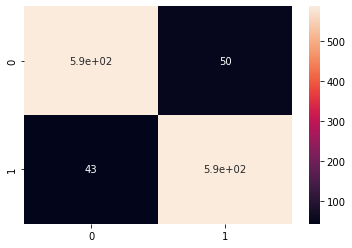

In [10]:
sm=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
sns.heatmap(sm,annot=True)
plt.show()

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay


In [17]:
print(classification_report(y_test,y_pred))
# The recall is pretty well 

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       638
        REAL       0.92      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



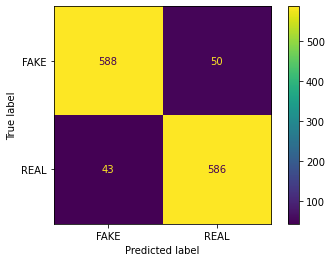

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [ ]:
So with this model, we have 589 true positives, 587 true negatives, 42 false positives, and 49 false negatives.
594 true positives: The number of correctly classified real news articles.
585 true negatives: The number of correctly classified fake news articles.
44 false positives: The number of fake news articles that were classified as real news.
44 false negatives: The number of real news articles that were classified as fake news.